# Text Analytics project by Paige McKenzie

Includes code to generate all visualizations used in my [blog post](https://p-mckenzie.github.io/python/2018/03/12/Bachelor-finale/).

In [1]:
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import nltk
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
df = pd.read_csv('bachelor_tweets.csv', index_col=0)
print df.shape
df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')-timedelta(hours=6))
df = df[~df['text'].isnull()]
df['day'] = df['time'].apply(lambda x:x.day)
df['hour'] = df['time'].apply(lambda x:x.hour)

df['text_clean'] = df['text'].apply(lambda x:re.sub(r"RT @[\w\d]+: ", '', x))
df['sent'] = df['text_clean'].apply(lambda x:analyser.polarity_scores(x)['compound'])

(657088, 7)


In [3]:
df['time'].min()

Timestamp('2018-02-27 17:49:52')

In [4]:
df['time'].max()

Timestamp('2018-03-10 13:10:46')

In [5]:
df = df[~df['text_clean'].isnull()]
df['text_clean'] = df['text_clean'].apply(lambda x:re.sub(r"http[\w:\/\.]+", '', x).lower()) #strip URLs and lowercase
df['text_clean'] = df['text_clean'].apply(lambda x:re.sub(r"((?<=[^\w])\'|\'(?=[^\w]))", '"', x)) #replace ' with "
df['text_clean'] = df['text_clean'].apply(lambda x:re.sub(r"[^\w ']", ' ', x)) #replace punctuation with spaces
df = df[df['text_clean'].str.contains('arie')^df['text_clean'].str.contains('bachelor')]
#df['time'] = df['time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df.sort_values('time', ascending=True, inplace=True)
print df.shape
df.head()

(345127, 11)


,screen_name,text,name,time,location,favorites,retweets,day,hour,text_clean,sent
520085,allyssatowery,RT @Hannasuewilson: On the bachelor that guy s...,Allyssa T,2018-02-27 17:50:54,"Tennessee, USA",0,6345,27,17,on the bachelor that guy straight up looked at...,-0.5267
520084,ashtoncleer,Franks being a bachelor is a sufficient and ne...,Ashton Cleer,2018-02-27 17:52:25,San Antonio/Oklahoma City,0,0,27,17,franks being a bachelor is a sufficient and ne...,0.0000
520083,_alviali,RT @Hannasuewilson: On the bachelor that guy s...,Alvi Ali,2018-02-27 17:53:15,Texas,0,6345,27,17,on the bachelor that guy straight up looked at...,-0.5267
520082,BachelorScarf,RT @HuffPostEnt: Herpes is reportedly the top ...,Bachelor Scarf,2018-02-27 17:53:53,NaN,0,5,27,17,herpes is reportedly the top reason people can...,0.2023
520079,trendinitalia,Arie pop e tempi funk conHit-Kunle https://t.c...,Trend in italia,2018-02-27 17:55:57,Italia,0,0,27,17,arie pop e tempi funk conhit kunle,0.0000


# Overall scale

In [6]:
df[(df['day']==5)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='3min'))['sent'].mean().index.tolist()[0]

Timestamp('2018-03-05 19:00:00', freq='3T')

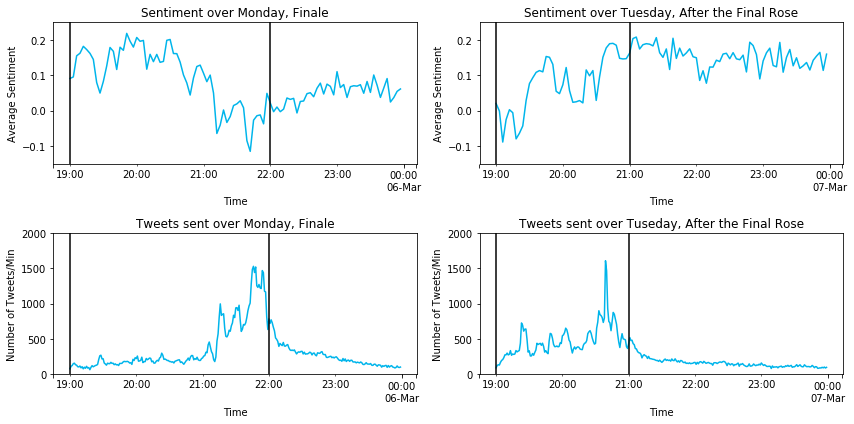

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(221)
df[(df['day']==5)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='3min'))['sent'].mean().plot(color='#00b5eb')
plt.ylim(-.15,.25)
plt.title('Sentiment over Monday, Finale')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.axvline(x='2018-03-05 19:00:00', color='black')
plt.axvline(x='2018-03-05 22:00:00', color='black')

plt.subplot(222)
df[(df['day']==6)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='3min'))['sent'].mean().plot(color='#00b5eb')
plt.ylim(-.15,.25)
plt.title('Sentiment over Tuesday, After the Final Rose')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.axvline(x='2018-03-06 19:00:00', color='black')
plt.axvline(x='2018-03-06 21:00:00', color='black')

plt.subplot(223)
df[(df['day']==5)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='min'))['screen_name'].count().plot(color='#00b5eb')
plt.ylim(0,2000)
plt.title('Tweets sent over Monday, Finale')
plt.xlabel('Time')
plt.ylabel('Number of Tweets/Min')
plt.axvline(x='2018-03-05 19:00:00', color='black')
plt.axvline(x='2018-03-05 22:00:00', color='black')

plt.subplot(224)
df[(df['day']==6)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='min'))['screen_name'].count().plot(color='#00b5eb')
plt.ylim(0,2000)
plt.title('Tweets sent over Tuseday, After the Final Rose')
plt.xlabel('Time')
plt.ylabel('Number of Tweets/Min')
plt.axvline(x='2018-03-06 19:00:00', color='black')
plt.axvline(x='2018-03-06 21:00:00', color='black')

plt.tight_layout()
plt.show()

# Sentiment towards couples

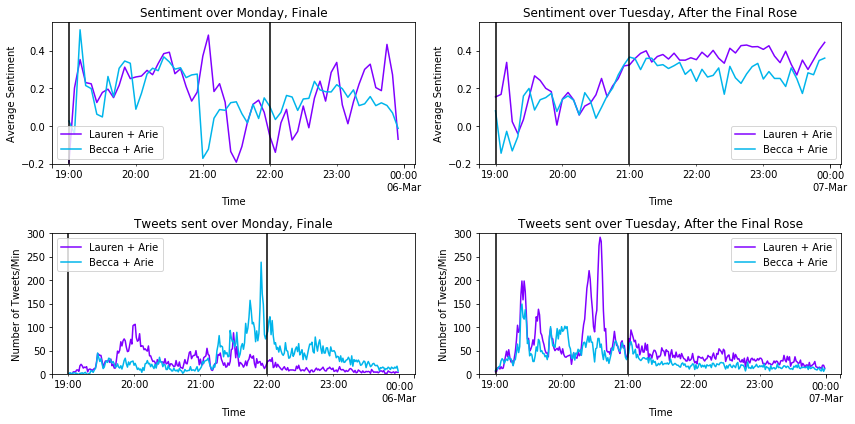

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(221)
df[(df['day']==5)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('lauren')].set_index('time').groupby(pd.Grouper(freq='5min'))['sent'].mean().plot(color='#8000ff')
df[(df['day']==5)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('becca')].set_index('time').groupby(pd.Grouper(freq='5min'))['sent'].mean().plot(color='#00b5eb')
plt.ylim(-.2,.55)
plt.title('Sentiment over Monday, Finale')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.legend(['Lauren + Arie', 'Becca + Arie'], loc='lower left')
plt.axvline(x='2018-03-05 19:00:00', color='black')
plt.axvline(x='2018-03-05 22:00:00', color='black')

plt.subplot(222)
df[(df['day']==6)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('lauren')].set_index('time').groupby(pd.Grouper(freq='5min'))['sent'].mean().plot(color='#8000ff')
df[(df['day']==6)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('becca')].set_index('time').groupby(pd.Grouper(freq='5min'))['sent'].mean().plot(color='#00b5eb')
plt.ylim(-.2,.55)
plt.title('Sentiment over Tuesday, After the Final Rose')
plt.xlabel('Time')
plt.ylabel('Average Sentiment')
plt.legend(['Lauren + Arie', 'Becca + Arie'], loc='lower right')
plt.axvline(x='2018-03-06 19:00:00', color='black')
plt.axvline(x='2018-03-06 21:00:00', color='black')

plt.subplot(223)
df[(df['day']==5)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('lauren')].set_index('time').groupby(pd.Grouper(freq='min'))['screen_name'].count().plot(color='#8000ff')
df[(df['day']==5)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('becca')].set_index('time').groupby(pd.Grouper(freq='min'))['screen_name'].count().plot(color='#00b5eb')
plt.ylim(0,300)
plt.title('Tweets sent over Monday, Finale')
plt.xlabel('Time')
plt.ylabel('Number of Tweets/Min')
plt.legend(['Lauren + Arie', 'Becca + Arie'], loc='upper left')
plt.axvline(x='2018-03-05 19:00:00', color='black')
plt.axvline(x='2018-03-05 22:00:00', color='black')

plt.subplot(224)
df[(df['day']==6)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('lauren')].set_index('time').groupby(pd.Grouper(freq='min'))['screen_name'].count().plot(color='#8000ff')
df[(df['day']==6)&(df['hour'].isin(range(19,25)))&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('becca')].set_index('time').groupby(pd.Grouper(freq='min'))['screen_name'].count().plot(color='#00b5eb')
plt.ylim(0,300)
plt.title('Tweets sent over Tuesday, After the Final Rose')
plt.xlabel('Time')
plt.ylabel('Number of Tweets/Min')
plt.legend(['Lauren + Arie', 'Becca + Arie'], loc='upper right')
plt.axvline(x='2018-03-06 19:00:00', color='black')
plt.axvline(x='2018-03-06 21:00:00', color='black')

plt.tight_layout()
plt.show()

In [9]:
df[(df['day']==5)&(df['hour']==21)&df['text_clean'].str.contains('arie')&df['text_clean'].str.contains('lauren')&(df['sent']<0)&(df['screen_name']=='Scottgrayson16')]['text'].values[0]

'ARIE CHOSE WRONG. LAUREN DESERVED BETTER. I HATE THIS SHOW'

# Word association

In [10]:
with open("english_dictionary.txt") as word_file:
    english_words = set(word.strip().lower() for word in word_file)
    
def is_english_word(word):
    return word in english_words

In [11]:
is_english_word('hello')

True

In [12]:
is_english_word('hahahahah')

False

In [13]:
cachedStopWords = nltk.corpus.stopwords.words("english")
cachedStopWords += ['arie', 'becca', 'lauren', 'bachelor', 'finale']

In [14]:
def condense_pos(df):
    df.loc[df['pos'].isin(['JJS', 'JJR']), 'pos'] = 'JJ'
    df.loc[df['pos'].isin(['NNP', 'NNPS', 'NNS']), 'pos'] = 'NN'
    df.loc[df['pos'].isin(['RBR', 'RBS']), 'pos'] = 'RB'
    df.loc[df['pos'].isin(['VBD' 'VBG', 'VBN', 'VBP', 'VBZ']), 'pos'] = 'VB'
    return df.loc[df['pos'].isin(['JJ', 'NN', 'RB', 'VB'])]

In [15]:
words = pd.Series([word for word in re.findall(r"[a-z']+", ' '.join(df['text_clean'])) if is_english_word(word) and word not in cachedStopWords]).value_counts().reset_index()
words.columns = ['word', 'count']
words['pos'] = pd.DataFrame(nltk.pos_tag(words['word']))[1]
words = condense_pos(words)
words.head()

,word,count,pos
1,love,17637,NN
3,season,15380,NN
4,watch,12158,NN
6,get,11309,VB
7,men,10178,NN


In [16]:
words.groupby('pos').head(5)

,word,count,pos
1,love,17637,NN
3,season,15380,NN
4,watch,12158,NN
6,get,11309,VB
7,men,10178,NN
8,women,10086,NN
9,go,9910,VB
15,right,8997,RB
17,think,8845,VB
18,know,8838,VB


# Lift on Monday

In [17]:
#calculate lift values

def calc_lift(a, b, df):
    df = df.drop_duplicates('text_clean')
    total_size = len(df)
    filter_a = df[df['text_clean'].str.contains(a)]
    num_a = len(filter_a)
    num_b = len(df[df['text_clean'].str.contains(b)])
    num_a_b = len(filter_a['text_clean'][filter_a['text_clean'].str.contains(b)])
    return total_size*float(num_a_b)/float(num_a*num_b)

In [18]:
calc_lift('arie', 'tool', df[df['day']==5])

1.7390005610282486

In [19]:
calc_lift('becca', 'goddess', df[df['day']==5])

2.14683135172573

### Hmm.

In [20]:
# make dataframe of lift values
people = ['arie', 'becca', 'lauren']
words = ['tool', 'goddess', 'queen', 'asshole', 'happy', 'cute', 'yay', 'hate',
         'handsome', 'beautiful', 'hot', 'forgive', 'blame',
        'love', 'couple', 'mess', 'fake', 'staged', 'angry', 'real', 'true', 'leave', 'poor']

In [21]:
lift_mon = pd.DataFrame(columns=people, index=words)

for word, series in list(lift_mon.iterrows()):
    for person in series.index:
        lift_mon[person].loc[word] = calc_lift(person, word, df[df['day']==5])

lift_mon = lift_mon.astype(float)
lift_mon

,arie,becca,lauren
tool,1.739001,0.648856,0.611414
goddess,1.049667,2.146831,0.000000
queen,0.703500,2.021219,0.622565
asshole,1.647170,1.106444,0.900324
happy,0.989930,1.439948,1.363906
cute,1.071089,1.204854,1.035067
yay,0.899715,0.690053,0.418008
hate,1.511635,0.520149,0.679737
handsome,0.984063,1.408858,0.000000
beautiful,1.196620,1.760402,1.638590


In [22]:
lift_mon.idxmax(axis=1)

tool           arie
goddess       becca
queen         becca
asshole        arie
happy         becca
cute          becca
yay            arie
hate           arie
handsome      becca
beautiful     becca
hot          lauren
forgive        arie
blame          arie
love         lauren
couple       lauren
mess           arie
fake           arie
staged        becca
angry         becca
real         lauren
true           arie
leave          arie
poor          becca
dtype: object

# Lift on Tuesday

In [23]:
calc_lift('arie', 'tool', df[df['day']==6])

1.5118532837321064

In [24]:
calc_lift('becca', 'goddess', df[df['day']==6])

3.0430348233735205

### Hmm.

In [25]:
lift_tue = pd.DataFrame(columns=people, index=words)

for word, series in list(lift_tue.iterrows()):
    for person in series.index:
        lift_tue[person].loc[word] = calc_lift(person, word, df[df['day']==6])

lift_tue = lift_tue.astype(float)
lift_tue

,arie,becca,lauren
tool,1.511853,0.640295,0.979004
goddess,0.656588,3.043035,0.375981
queen,0.615747,2.601409,0.606022
asshole,1.897494,0.917381,1.256119
happy,0.897382,1.837501,1.646912
cute,1.085941,1.181059,1.003237
yay,0.150633,2.716239,0.276742
hate,1.660998,0.526687,1.179873
handsome,1.228416,0.662705,0.368462
beautiful,0.904911,1.537769,0.966957


In [26]:
lift_tue.idxmax(axis=1)

tool           arie
goddess       becca
queen         becca
asshole        arie
happy         becca
cute          becca
yay           becca
hate           arie
handsome       arie
beautiful     becca
hot           becca
forgive      lauren
blame          arie
love         lauren
couple       lauren
mess         lauren
fake         lauren
staged        becca
angry          arie
real         lauren
true         lauren
leave          arie
poor          becca
dtype: object

# Plot co-occurrence percentages over the days

In [27]:
lift = pd.DataFrame(columns=people, index=words)

for word, series in list(lift.iterrows()):
    for person in series.index:
        lift[person].loc[word] = calc_lift(person, word, df[df['day'].isin([5,6])])

lift = lift.astype(float)

In [28]:
def plot_with(name, lst, df):
    df = df[df['text_clean'].str.contains(name)&(df['day'].isin([5,6]))]
    colors = [matplotlib.colors.rgb2hex(i[:3]) for i in matplotlib.cm.get_cmap('rainbow')(np.linspace(0, 1, 5))]
    plt.figure(figsize=(15,4))
    
    plt.subplot(121)
    for item, color in zip(lst,colors):
        df[df['text_clean'].str.contains(item)&(df['day']==5)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='5min'))['text'].count().fillna(0).div(df[(df['day']==5)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='5min'))['text'].count(), fill_value=0).plot(color=color)
        plt.title("Percentage of tweets mentioning {} on Monday, Finale".format(name.title()))
    plt.legend(lst, loc='upper left')
    plt.ylabel('P( descriptor | {} )'.format(name.title()))
    plt.xlabel('Time')
    plt.axvline(x='2018-03-05 19:00:00', color='black')
    plt.axvline(x='2018-03-05 22:00:00', color='black')
        
    plt.subplot(122)
    for item, color in zip(lst,colors):
        df[df['text_clean'].str.contains(item)&(df['day']==6)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='5min'))['text'].count().fillna(0).div(df[(df['day']==6)&(df['hour'].isin(range(19,25)))].set_index('time').groupby(pd.Grouper(freq='5min'))['text'].count(), fill_value=0).plot(color=color)
        plt.title("Percentage of tweets mentioning {} on Tuesday, After the Final Rose".format(name.title()))
    plt.legend(lst, loc='upper right')
    plt.ylabel('P( descriptor | {} )'.format(name.title()))
    plt.xlabel('Time')
    plt.axvline(x='2018-03-06 19:00:00', color='black')
    plt.axvline(x='2018-03-06 21:00:00', color='black')
    
    plt.tight_layout()
    plt.show()

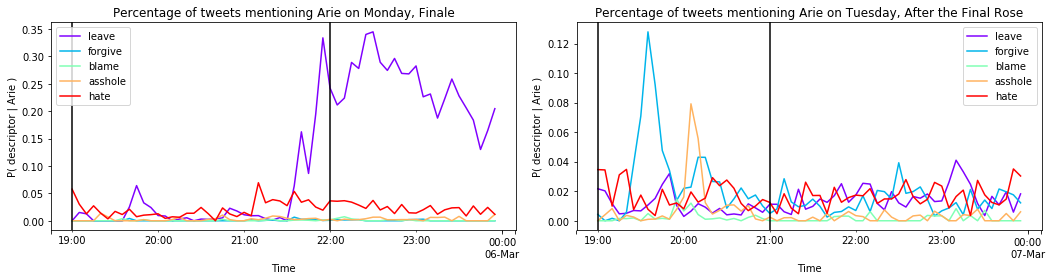

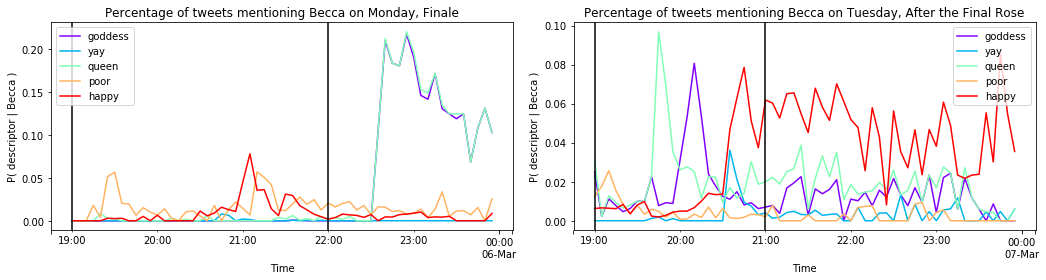

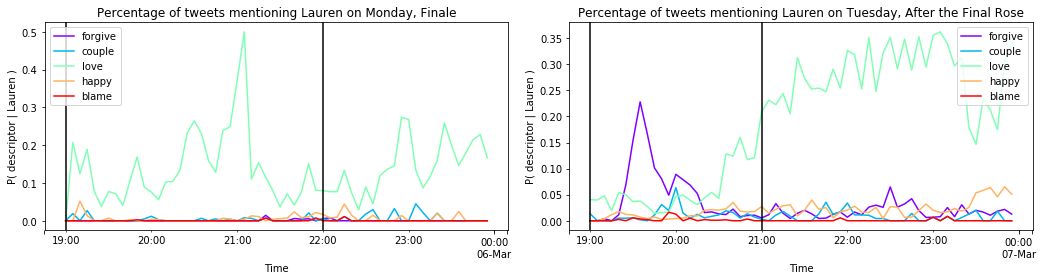

In [29]:
for char in people:
    lst = lift.sort_values(char, ascending=False).head(5).index.tolist()
    plot_with(char, lst, df)